In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [15]:
df.shape

(11251, 14)

In [16]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


Data Cleaning Process The info() method prints information about the DataFrame.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


As we can see we have 2 columns 'Status' and 'Unnamed', where we have zero records so we can drop these 2 columns.

In [7]:
df.drop(['Status', 'Unnamed'], axis = 1, inplace = True)

After droping empty column we can cross check the dataset.

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


Now, we will deal with NULL values as a data cleaning process.

In [20]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False


Sum of all NULL values.

In [21]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In Amount column we have 12 NULL values.

In [8]:
rows_with_null = df[df.isnull().any(axis = 1)]
print(rows_with_null)

     User_ID Cust_name Product_ID Gender  Age  Marital_Status           State  \
7    1002092  Shivangi  P00273442      F   61               0     Maharashtra   
14   1003858      Cano  P00293742      M   46               1  Madhya Pradesh   
16   1005447       Amy  P00275642      F   48               1  Andhra Pradesh   
109  1005265    Sakshi  P00296242      F   48               1           Delhi   
111  1005261   Apoorva  P00057942      F   41               1           Delhi   
184  1005538    Kartik  P00269542      F   49               1       Karnataka   
293  1000326  Jonathan  P00120542      M   53               0         Gujarat   
344  1002507   Lakshmi  P00045842      F   35               1         Gujarat   
345  1004498   Srishti  P00030842      F   55               0           Delhi   
452  1004601    Gaurav  P00014442      F   40               1  Madhya Pradesh   
464  1004528    Anurag  P00338442      F   33               1   Uttar Pradesh   
493  1002994    Hemant   P00

In [9]:
df['Amount'] = df.groupby('Product_Category') ['Amount'].transform (lambda x:x.fillna(x.mean()))
df.dropna(inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11251 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


Changing 'Amount' data type from float to int

In [10]:
df['Amount'] = df['Amount'].astype('int')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11251 non-null  int64 
 1   Cust_name         11251 non-null  object
 2   Product_ID        11251 non-null  object
 3   Gender            11251 non-null  object
 4   Age               11251 non-null  int64 
 5   Marital_Status    11251 non-null  int64 
 6   State             11251 non-null  object
 7   Zone              11251 non-null  object
 8   Occupation        11251 non-null  object
 9   Product_Category  11251 non-null  object
 10  Orders            11251 non-null  int64 
 11  Amount            11251 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 1.0+ MB


In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

Changing 'Marital_Status' column name with 'Married'

In [11]:
df.rename(columns = {'Marital_Status' : 'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206


Creating new function to make a Age_Group column based on Age column.

In [12]:
def Categorize_age(age):
    if age <=17:
        return '0-17'
    elif age <=25:
        return '18-25'
    elif age <=35:
        return '26-35'
    elif age <=45:
        return '36-45'
    elif age <=50:
        return '46-50'
    elif age <=55:
        return '51-55'
    else:
        return '55+'
df['Age_Group'] = df['Age'].apply(Categorize_age)
print(df)

       User_ID    Cust_name Product_ID Gender  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F   28               0   
1      1000732       Kartik  P00110942      F   35               1   
2      1001990        Bindu  P00118542      F   35               1   
3      1001425       Sudevi  P00237842      M   16               0   
4      1000588         Joni  P00057942      M   28               1   
...        ...          ...        ...    ...  ...             ...   
11246  1000695      Manning  P00296942      M   19               1   
11247  1004089  Reichenbach  P00171342      M   33               0   
11248  1001209        Oshin  P00201342      F   40               0   
11249  1004023       Noonan  P00059442      M   37               0   
11250  1002744      Brumley  P00281742      F   19               0   

                State      Zone       Occupation Product_Category  Orders  \
0         Maharashtra   Western       Healthcare             Auto       1   
1    

In [31]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9460.454626
std,1.716125e+03,12.754122,0.493632,1.115047,5224.434220
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12691.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


### EDA | Exploratory Data Analysis

EDA on Sales based on Gender:-

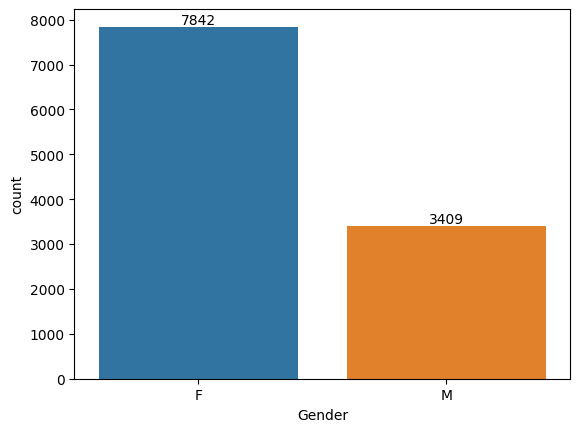

In [25]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df, hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

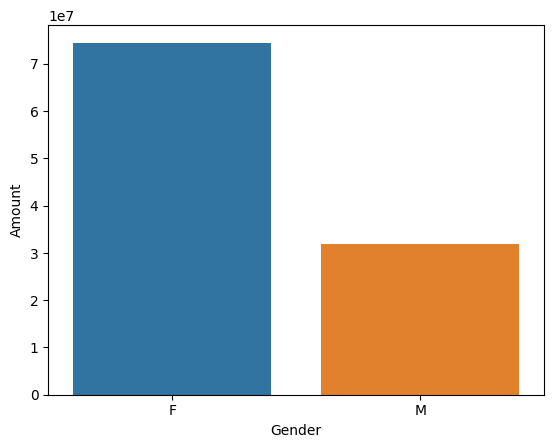

In [26]:

Sales_gen = df.groupby(['Gender'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.barplot(x = 'Gender' , y= 'Amount', data = Sales_gen, hue = 'Gender')

Conclusion:-
    Female customers made more purchases and spent more overall compared to male customers.


In [35]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Age_Group
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,26-35
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,26-35
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,26-35
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912,0-17
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877,26-35


### AGE


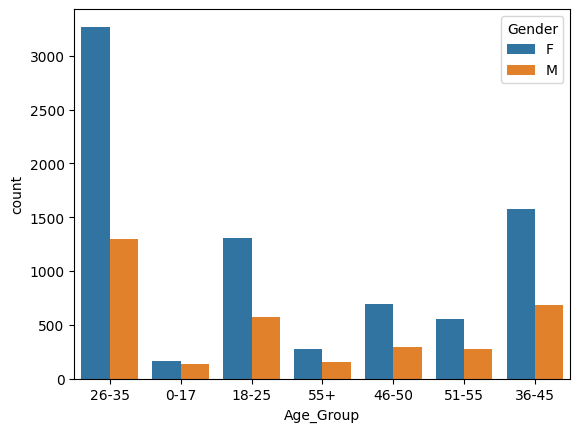

In [32]:
ax = sns.countplot(x = 'Age_Group',data = df, hue = 'Gender')

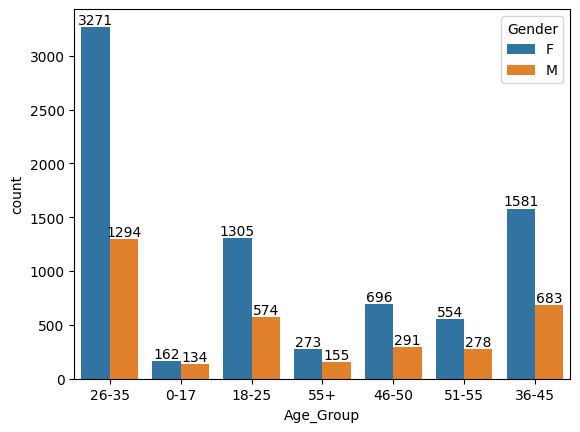

In [27]:
ax = sns.countplot(x = 'Age_Group',data = df, hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)


    

<Axes: xlabel='Age_Group', ylabel='Amount'>

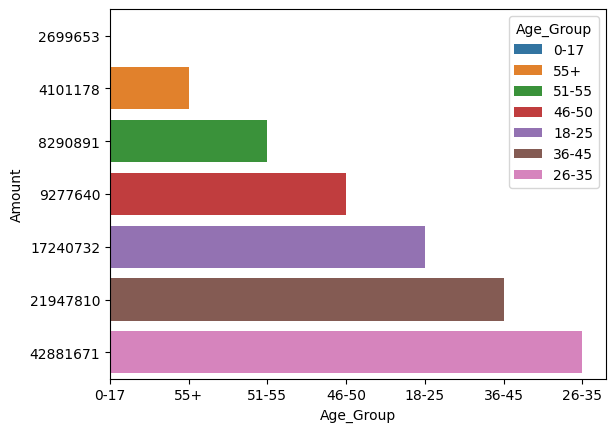

In [40]:
Sales_age = df.groupby(['Age_Group'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.barplot(x = 'Age_Group' , y= 'Amount', data = Sales_age, hue = 'Age_Group',orient='h')

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

In [44]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Age_Group
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,26-35
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,26-35
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,26-35
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912,0-17
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877,26-35


### Location


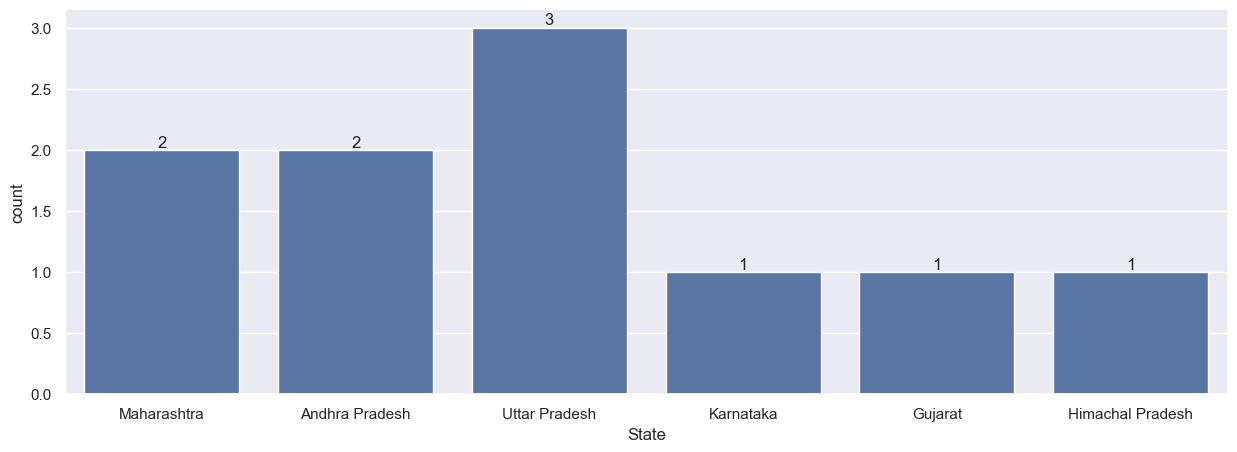

In [ ]:

top_10_states = df.head(10)
ax = sns.countplot(x = 'State',data = top_10_states)

for bars in ax.containers:
    ax.bar_label(bars)



<Axes: xlabel='State', ylabel='Amount'>

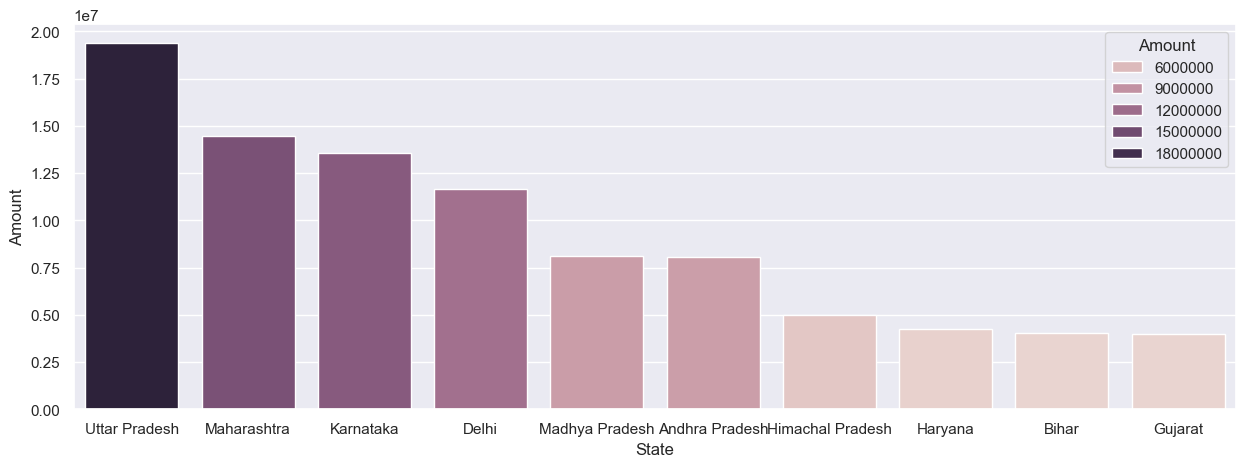

In [60]:

# Sales based on State

Sales_state = df.groupby(['State'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount' , ascending = False).head(10)

sns.barplot(x = 'State' , y= 'Amount', data = Sales_state,hue = 'Amount')

<Axes: xlabel='State', ylabel='Orders'>

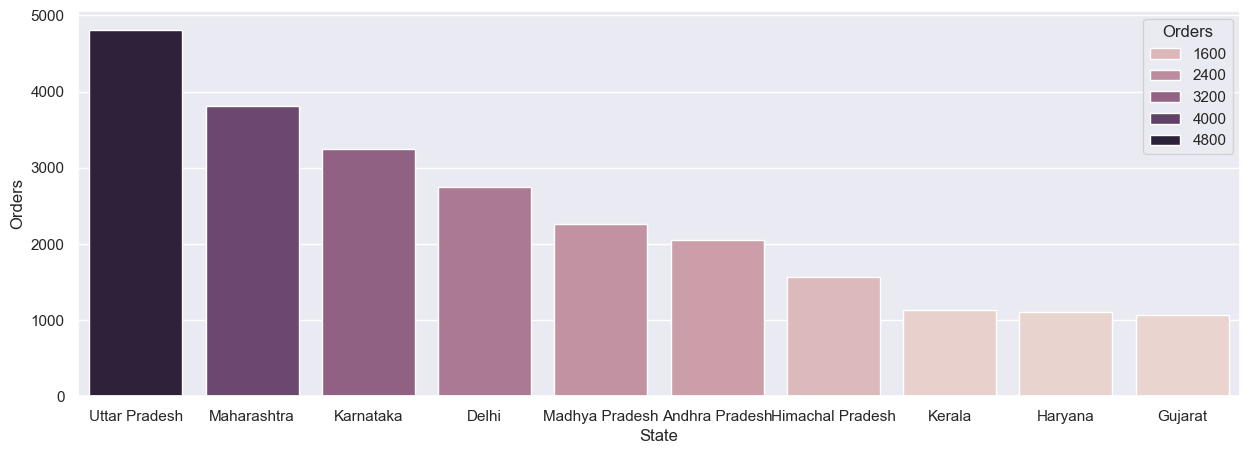

In [59]:
# Order based on State

Order_state = df.groupby(['State'], as_index = False) ['Orders'].sum().sort_values(by = 'Orders' , ascending = False).head(10)

sns.barplot(x = 'State' , y= 'Orders', data = Order_state,hue = 'Orders')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

In [61]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

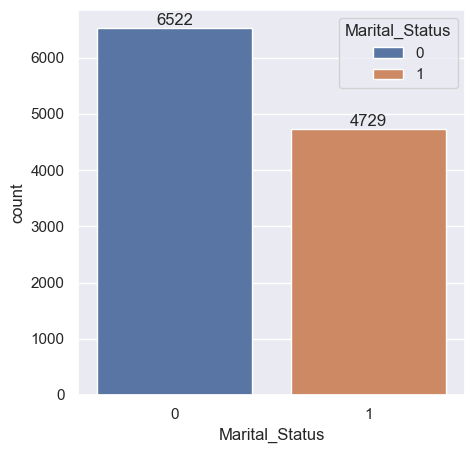

In [77]:
ax = sns.countplot(x = 'Marital_Status',data = df,hue='Marital_Status')
sns.set(rc={'figure.figsize':(5,3)})
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Marital_Status', ylabel='Amount'>

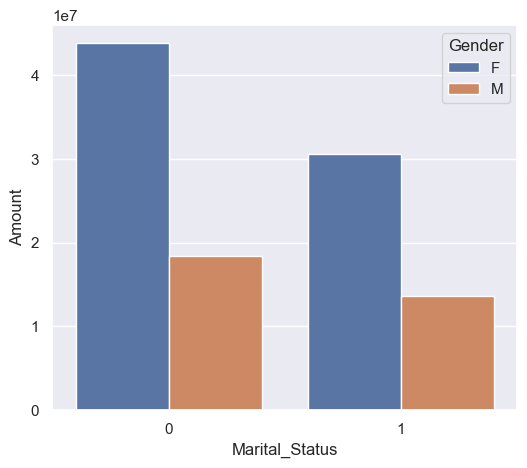

In [69]:
Sales_maritalStatus = df.groupby(['Marital_Status','Gender'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount' , ascending = False)
sns.set(rc={'figure.figsize':(6,5)})

sns.barplot(x = 'Marital_Status' , y= 'Amount', data = Sales_maritalStatus, hue ='Gender')

<Axes: xlabel='Marital_Status', ylabel='Orders'>

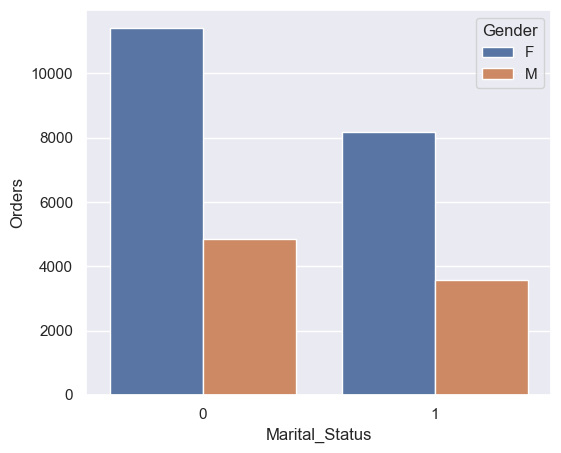

In [75]:
Sales_maritalStatus = df.groupby(['Marital_Status','Gender'], as_index = False) ['Orders'].sum().sort_values(by = 'Orders' , ascending = False)
#sns.set(rc={'figure.figsize':(6,5)})

sns.barplot(x = 'Marital_Status' , y= 'Orders', data = Sales_maritalStatus, hue ='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

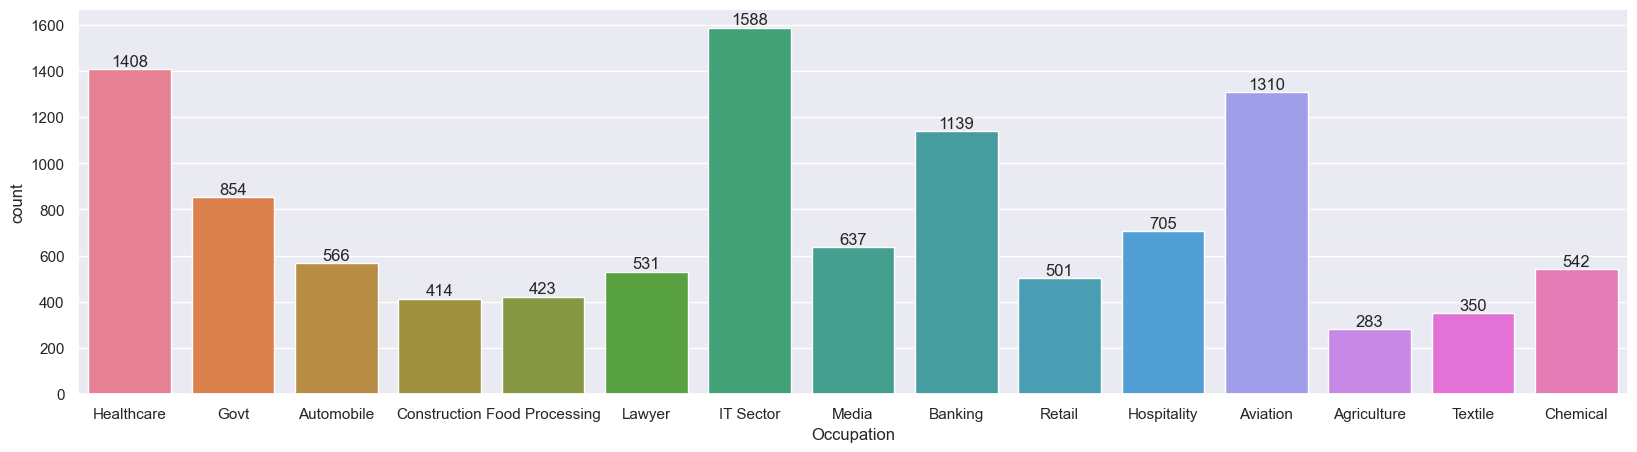

In [81]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(x = 'Occupation',data = df,hue='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

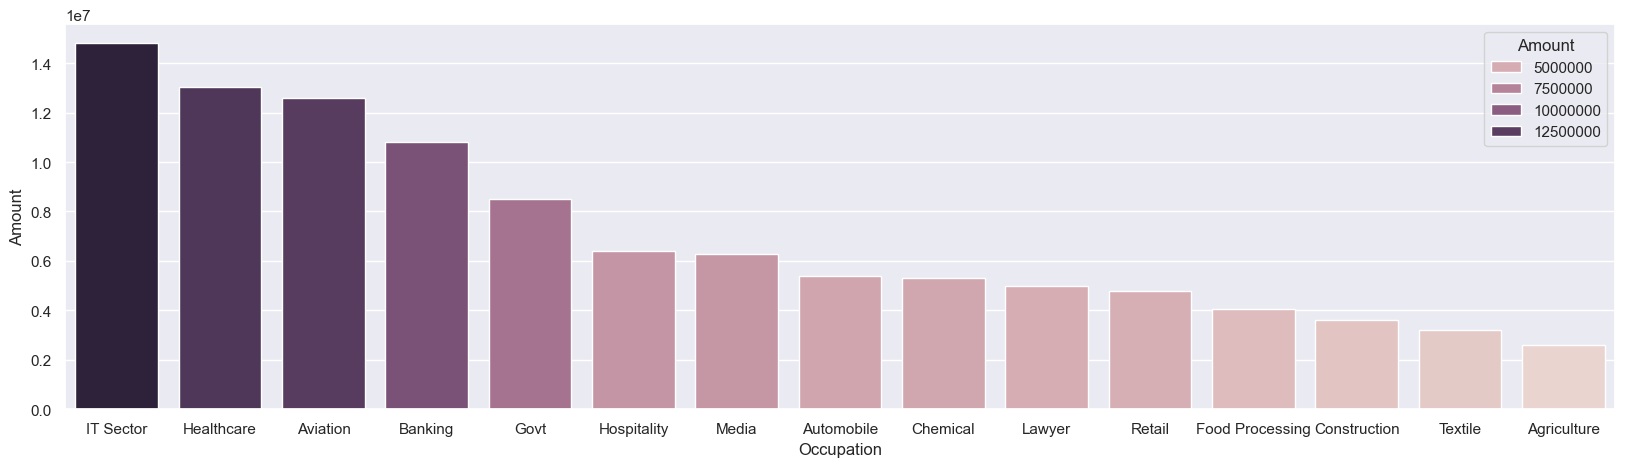

In [84]:
# Sales according to Occupation

sns.set(rc={'figure.figsize':(20,5)})
Sales_occ = df.groupby(['Occupation'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.barplot(x = 'Occupation' , y= 'Amount', data = Sales_occ,hue='Amount')

<Axes: xlabel='Occupation', ylabel='Orders'>

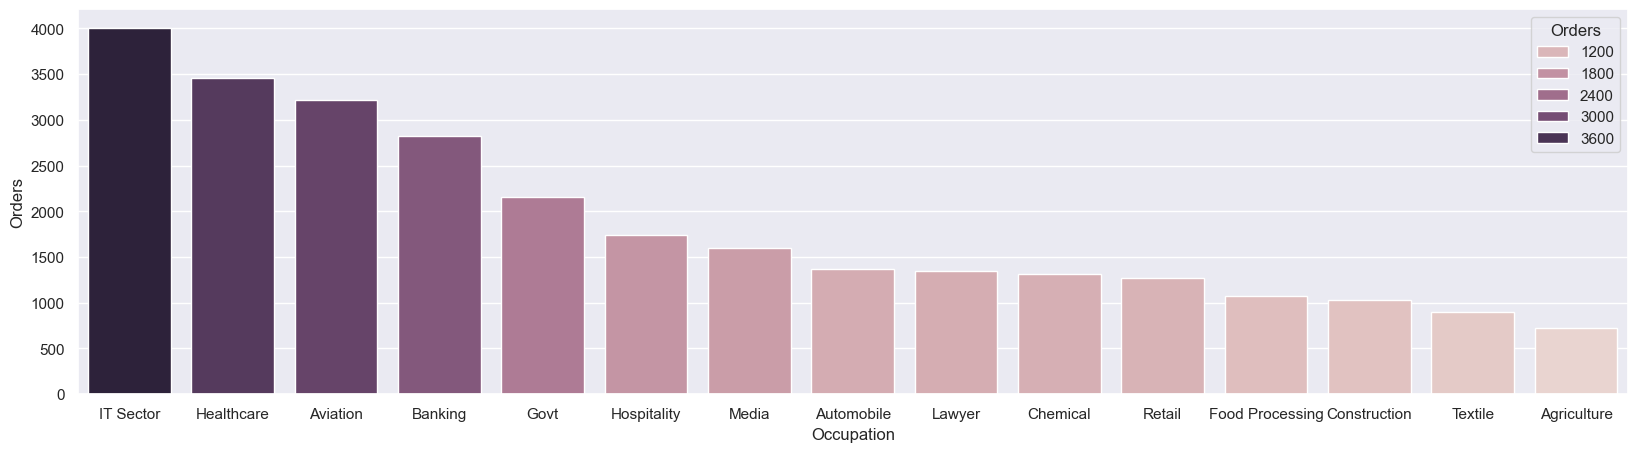

In [85]:
# Order according to Occupation

sns.set(rc={'figure.figsize':(20,5)})
Sales_occ = df.groupby(['Occupation'], as_index = False) ['Orders'].sum().sort_values(by = 'Orders' , ascending = False)

sns.barplot(x = 'Occupation' , y= 'Orders', data = Sales_occ,hue='Orders')

<Axes: xlabel='Occupation', ylabel='Orders'>

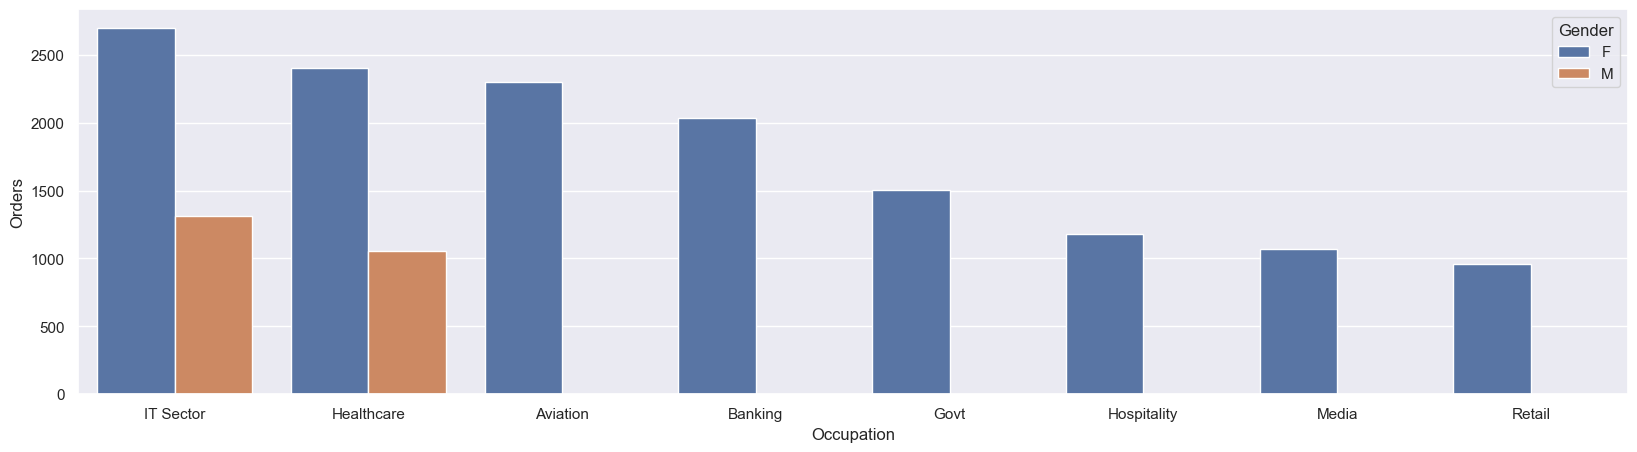

In [87]:
# Order according to Occupation and gender

sns.set(rc={'figure.figsize':(20,5)})
Sales_occ = df.groupby(['Occupation','Gender'], as_index = False) ['Orders'].sum().sort_values(by = 'Orders' , ascending = False).head(10)

sns.barplot(x = 'Occupation' , y= 'Orders', data = Sales_occ,hue='Gender')

In [88]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

### Product Category

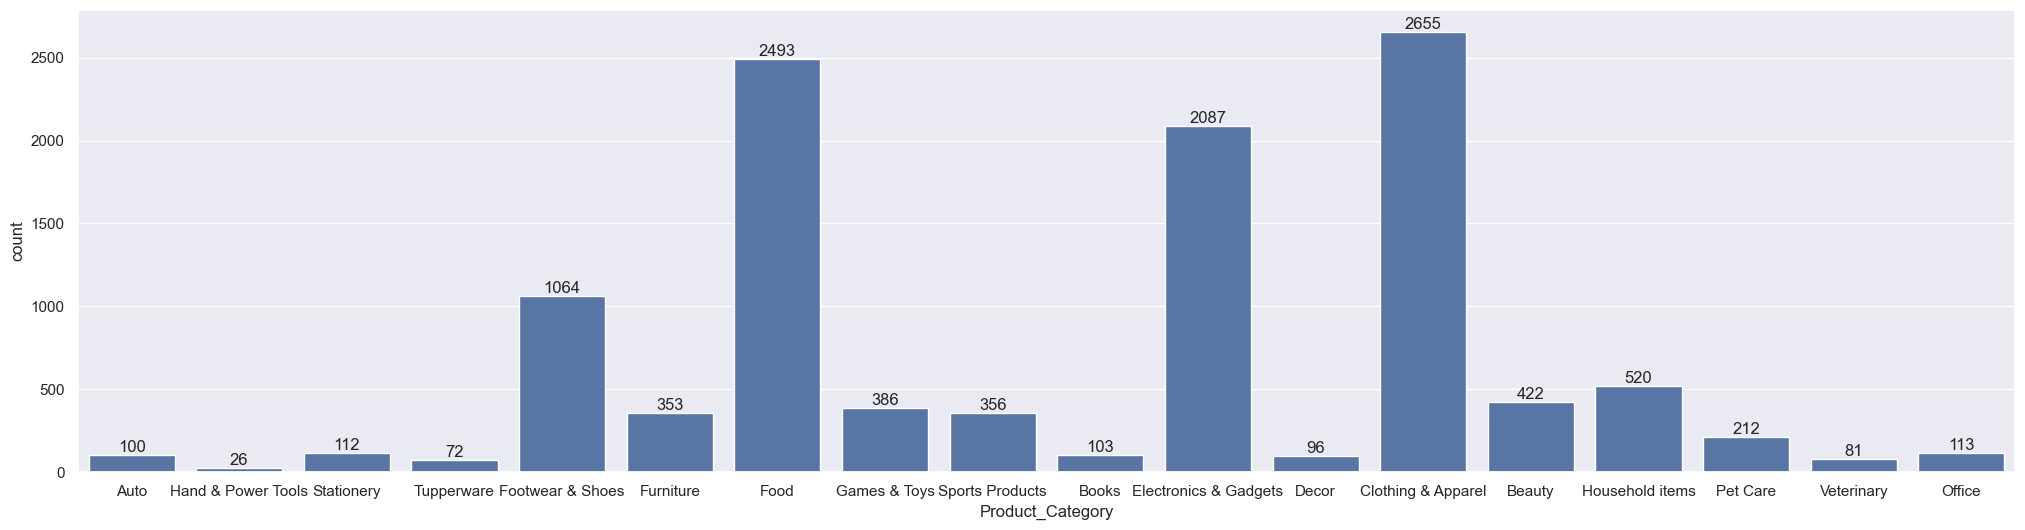

In [94]:
sns.set(rc={'figure.figsize':(25,6)})
ax = sns.countplot(x = 'Product_Category',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

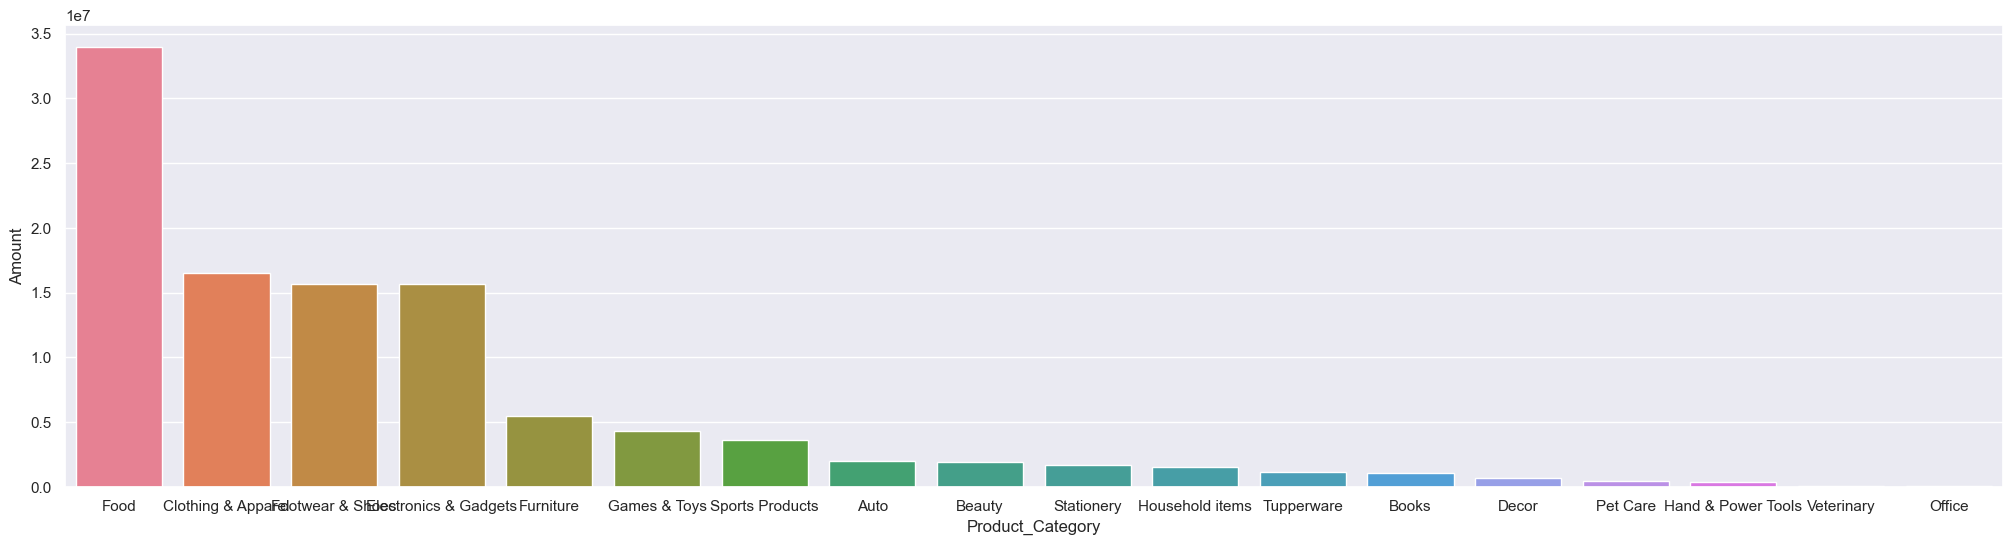

In [98]:
# Product based on their sales

sns.set(rc={'figure.figsize':(25,6)})
Prod_cat = df.groupby(['Product_Category'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.barplot(x = 'Product_Category' , y= 'Amount', data = Prod_cat, hue = 'Product_Category')

<Axes: xlabel='Product_Category', ylabel='Amount'>

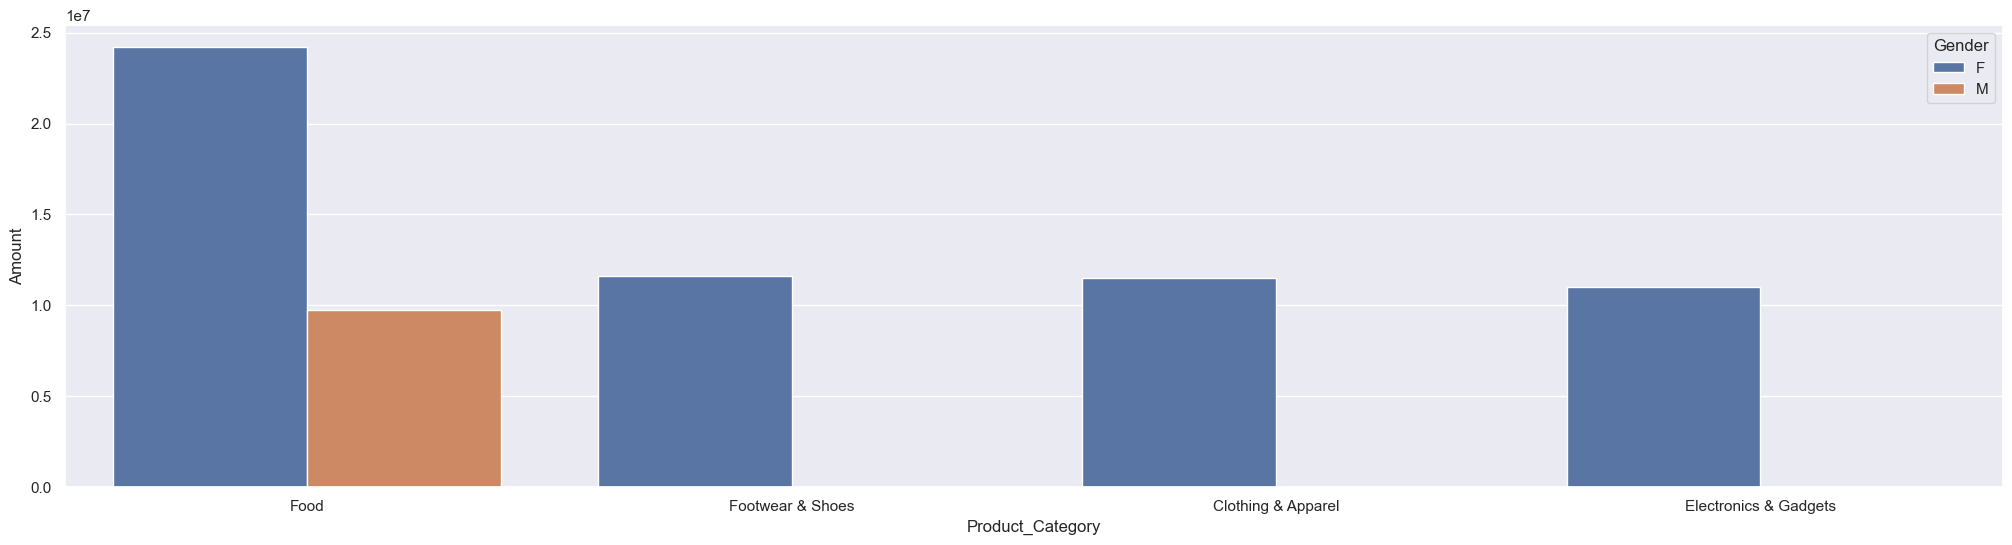

In [106]:
# Product based on their sales

sns.set(rc={'figure.figsize':(25,6)})
Prod_cat = df.groupby(['Product_Category','Gender'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount' , ascending = False).head(5)

sns.barplot(x = 'Product_Category' , y= 'Amount', data = Prod_cat, hue = 'Gender')

<Axes: xlabel='Product_Category', ylabel='Orders'>

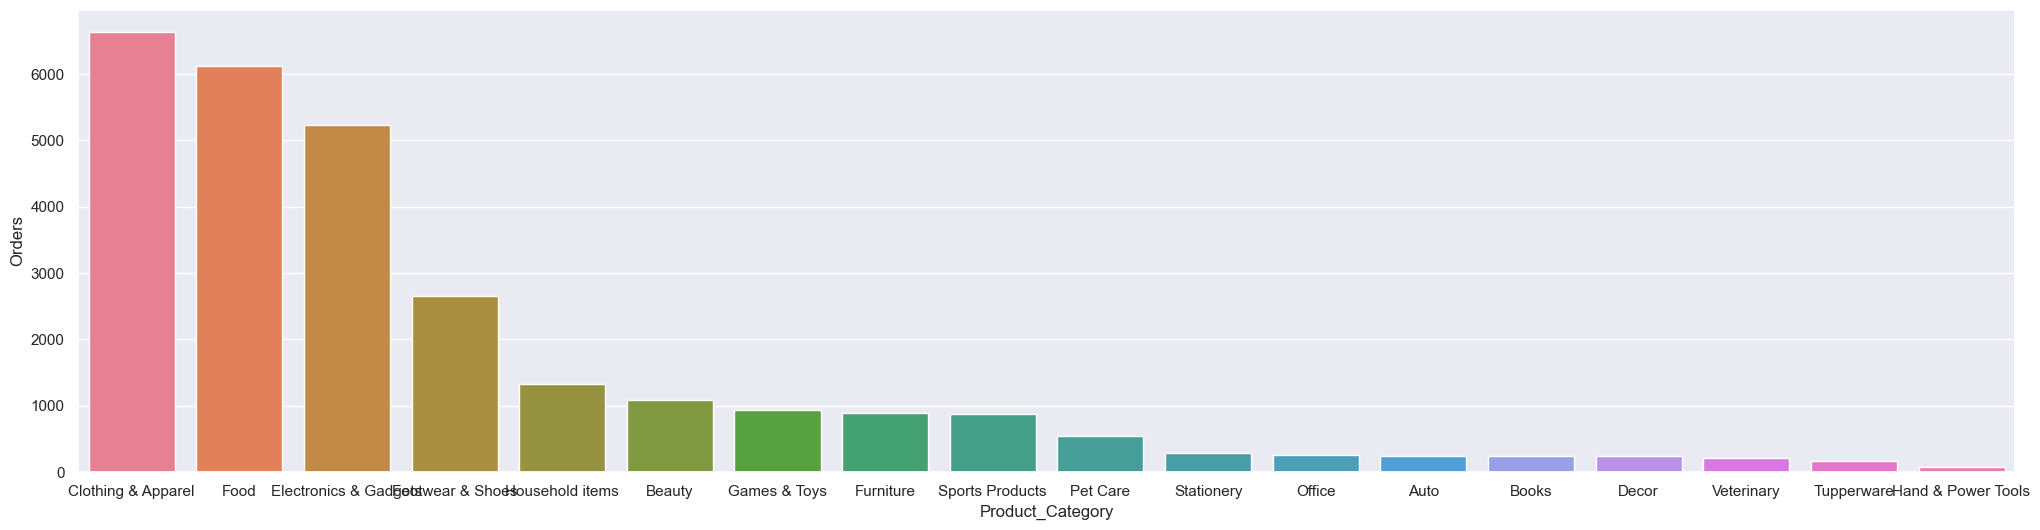

In [99]:
# Product based on their Orders

sns.set(rc={'figure.figsize':(25,6)})
Prod_cat = df.groupby(['Product_Category'], as_index = False) ['Orders'].sum().sort_values(by = 'Orders' , ascending = False)

sns.barplot(x = 'Product_Category' , y= 'Orders', data = Prod_cat, hue = 'Product_Category')

<Axes: xlabel='Product_Category', ylabel='Orders'>

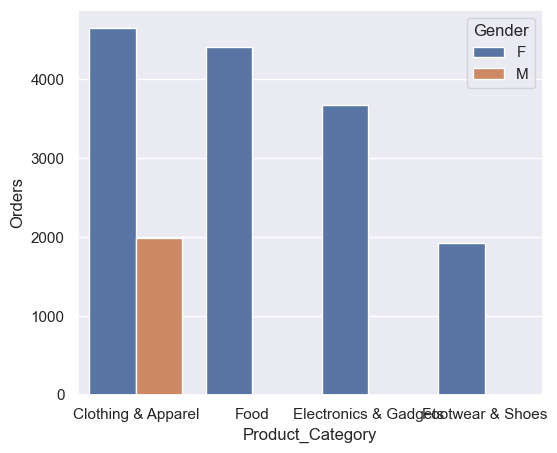

In [107]:
# Product based on their Orders

sns.set(rc={'figure.figsize':(6,5)})
Prod_cat = df.groupby(['Product_Category','Gender'], as_index = False) ['Orders'].sum().sort_values(by = 'Orders' , ascending = False).head(5)

sns.barplot(x = 'Product_Category' , y= 'Orders', data = Prod_cat, hue = 'Gender')

*According to Product category we can say clothing & Apparel, Food and Electronics & Gadgets are more like to Sale according to other categories and Female buyers are more buying than male buyers*

### Conclusion

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Clothing, Food and Electronics category*

### Business Growth Suggestions:

Targeted Marketing: Focus on female customers. 

Promotions: Schedule offers based on female preferences during peak shopping times.

Regional Campaigns: Localize marketing efforts in high-purchase regions.

Product Development: Stock and feature popular items based on preferences.
